In [33]:
import random,time,timeit
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font",family='MicroSoft YaHei',weight="bold")

#计数排序
def count_sort(input_list):
    length = len(input_list)
    if length < 2:
        return input_list
    max_num = max(input_list)
    count = [0] * (max_num + 1)
    for element in input_list:
        count[element] += 1
    output_list = []
    for i in range(max_num + 1):
        for j in range(count[i]):  # count[i]表示元素i出现的次数，如果有多次，通过循环重复追加        
            output_list.append(i)
    return output_list

#归并排序
def mergeSort(arr):
    import math
    if(len(arr)<2):
        return arr
    middle = math.floor(len(arr)/2)
    left, right = arr[0:middle], arr[middle:]
    return merge(mergeSort(left), mergeSort(right))
def merge(left,right):
    result = []
    while left and right:
        if left[0] <= right[0]:
            result.append(left.pop(0));
        else:
            result.append(right.pop(0));
    while left:
        result.append(left.pop(0));
    while right:
        result.append(right.pop(0));
    return result

#插入排序
def insertionSort(arr):
    for i in range(len(arr)):
        preIndex = i-1
        current = arr[i]
        while preIndex >= 0 and arr[preIndex] > current:
            arr[preIndex+1] = arr[preIndex]
            preIndex-=1
        arr[preIndex+1] = current
    return arr

#快速排序
def quickSort(arr, left=None, right=None):
    left = 0 if not isinstance(left,(int, float)) else left
    right = len(arr)-1 if not isinstance(right,(int, float)) else right
    if left < right:
        partitionIndex = partition(arr, left, right)
        quickSort(arr, left, partitionIndex-1)
        quickSort(arr, partitionIndex+1, right)
    return arr
def partition(arr, left, right):
    pivot = left
    index = pivot+1
    i = index
    while  i <= right:
        if arr[i] < arr[pivot]:
            swap(arr, i, index)
            index+=1
        i+=1
    swap(arr,pivot,index-1)
    return index-1
def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

#冒泡排序
def bubbleSort(arr):
    for i in range(1, len(arr)):
        for j in range(0, len(arr)-i):
            if arr[j] > arr[j+1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

#选择排序
def pai_xu(list_date):
    for i in range(len(list_date)): 
        Mini_mum = i 
        for j in range(i+1, len(list_date)): 
            if list_date[ Mini_mum] >list_date[j]: 
                 Mini_mum= j

        list_date[i], list_date[Mini_mum] = list_date[Mini_mum], list_date[i] 

#将生成长度为quantity的一组随机数
def test(left,right,quantity):
    text_list=list(random.sample(range(left,right),quantity))
    return text_list
    
#计算排序算法的时间
def timerun(func,text):
    start = timeit.default_timer()
    func(text)
    end=timeit.default_timer()
    return(end-start)

#统计算法运行时间。将计算结果x，y保存在数字组里
def time_statistics(func,x):
    timedate=list()
    for i in range(2000,x+1,300):
        textlist=test(1,i+2,i)
        stat=timerun(func,textlist)
        timedate.append([i,stat])
    return np.array(timedate)

#nlon(n)拟合函数，将散点拟合。
def nlogn_fit(ceshi):
    x=ceshi[:,0]
    z1,z2= np.polyfit(x*np.log(x),ceshi[:,1], 1)
    y=z1*(x)*np.log(x)+z2
    return x,y

#n^2拟合函数，将散点拟合成曲线.
def nn_fit(ceshi):
    x=ceshi[:,0]
    z= np.polyfit(x,ceshi[:,1], 2)
    y1=np.poly1d(z)
    y=y1(x)
    return x,y

#n+k拟合函数，将散点拟合直线。
def n_fit(ceshi):
    x=ceshi[:,0]
    z= np.polyfit(x,ceshi[:,1], 1)
    y1=np.poly1d(z)
    y=y1(x)
    return x,y


#将排序数据量num，测试函数fun1代入直角坐标系。func2是拟合函数，并对散点进行函数拟合。
def ceshifunction(func1,func2,num):
    ceshi=time_statistics(func1,num)
    x,y=func2(ceshi)
    return x,y,ceshi




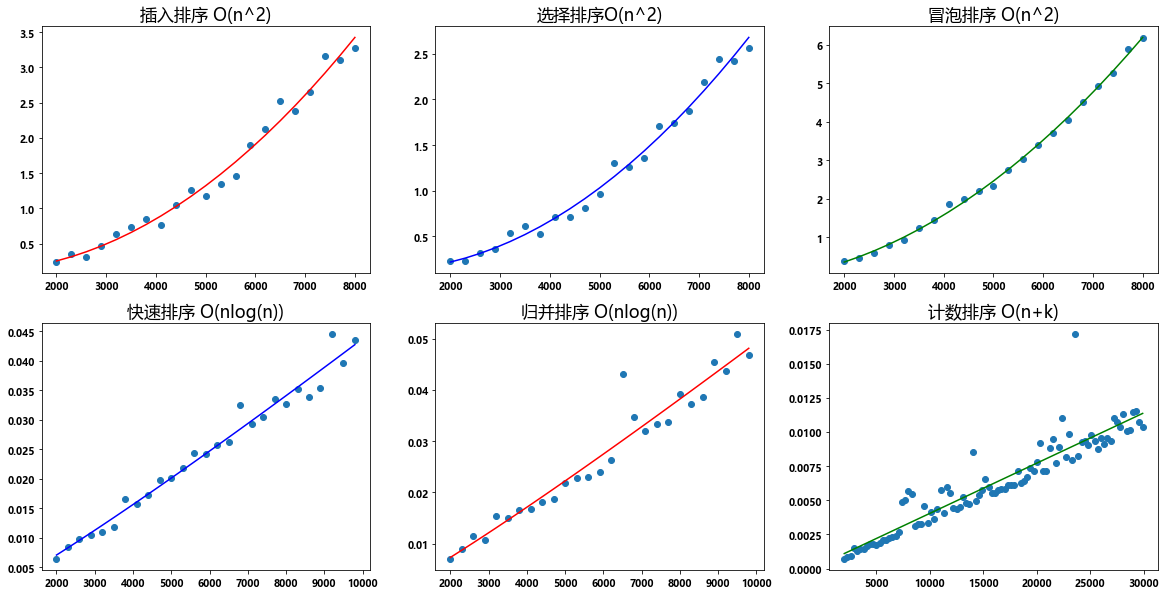

In [68]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)



#插入排序 O(n^2)
x1,y1,ceshi1=ceshifunction(insertionSort,nn_fit,8000)
ax1.scatter(*zip(*ceshi1)) 
ax1.plot(x1,y1,'r')
ax1.set_title('插入排序 O(n^2)',fontsize=17)

#选择排序O(n^2)
x2,y2,ceshi2=ceshifunction(pai_xu,nn_fit,8000)
ax2.scatter(*zip(*ceshi2)) 
ax2.plot(x2,y2,'b')
ax2.set_title('选择排序O(n^2)',fontsize=17)

#冒泡排序 O(n^2)
x3,y3,ceshi3=ceshifunction(bubbleSort,nn_fit,8000)
ax3.scatter(*zip(*ceshi3)) 
ax3.plot(x3,y3,'g')
ax3.set_title('冒泡排序 O(n^2)',fontsize=17)

#快速排序 O(nlog(n))
x4,y4,ceshi4=ceshifunction(quickSort,nlogn_fit,10000)
ax4.scatter(*zip(*ceshi4)) 
ax4.plot(x4,y4,'b')
ax4.set_title('快速排序 O(nlog(n))',fontsize=17)

#归并排序 O(nlog(n))
x5,y5,ceshi5=ceshifunction(mergeSort,nlogn_fit,10000)
ax5.scatter(*zip(*ceshi5)) 
ax5.plot(x5,y5,'r')
ax5.set_title('归并排序 O(nlog(n))',fontsize=17)

#计数排序 O(n+k)
x6,y6,ceshi6=ceshifunction(count_sort,n_fit,30000)
ax6.scatter(*zip(*ceshi6)) 
ax6.plot(x6,y6,'g')
ax6.set_title('计数排序 O(n+k)',fontsize=17)

plt.show()


In [45]:

#for循环阶乘
def Fact(x):
    fact=1
    for i in range(1,x+1):
        fact*=i
    return fact
#递归阶乘
def Fact_recursion(x):
    if(x==1):
        return 1
    else:
        return x*Fact_recursion(x-1)

def timefunction(func,x):
    timedate=list()
    for i in range(10,x+1,2):
        stat=timerun(func,i)
        timedate.append([i,stat])
    return np.array(timedate)

def ceshifunction2(func1,func2,num):
    ceshi=timefunction(func1,num)
    x,y=func2(ceshi)
    return x,y,ceshi
    

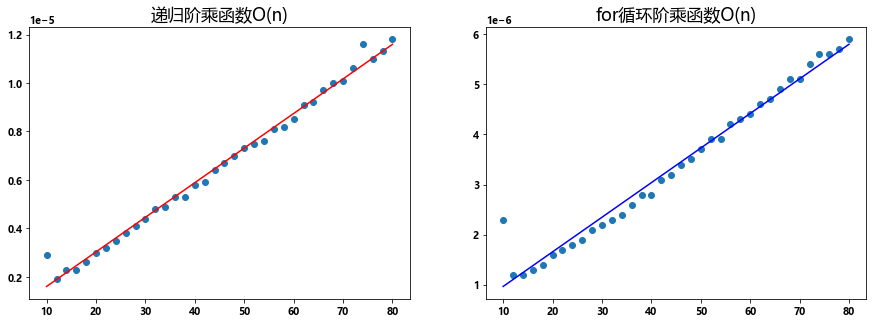

In [62]:
fig= plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

#print("递归阶乘函数O(n)")
x1,y1,ceshi1=ceshifunction2(Fact_recursion,n_fit,80)
ax1.scatter(*zip(*ceshi1)) 
ax1.plot(x1,y1,'r')
ax1.set_title('递归阶乘函数O(n)',fontsize=17)

#for循环阶乘函数O(n)
x2,y2,ceshi2=ceshifunction2(Fact,n_fit,80)
ax2.scatter(*zip(*ceshi2)) 
ax2.plot(x2,y2,'b')
ax2.set_title('for循环阶乘函数O(n)',fontsize=17)

plt.show()